<a href="https://colab.research.google.com/github/abhishekdconviction/100-Days-Of-ML-Code/blob/master/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving summer2016.csv to summer2016.csv
Saving medals_by_country_2016.csv to medals_by_country_2016.csv
Saving climate_change.csv to climate_change.csv
Saving austin_weather.csv to austin_weather.csv
Saving seattle_weather.csv to seattle_weather.csv


In [ ]:
austin_weather = pd.read_csv("austin_weather.csv")
seattle_weather = pd.read_csv("seattle_weather.csv")

In [ ]:
#austin_weather.info()
pd.set_option('max_columns', None)
austin_weather.head()
austin_weather.columns
austin_weather = austin_weather.loc[:,['STATION', 'NAME', 'DATE','MLY-PRCP-25PCTL',
       'MLY-PRCP-50PCTL', 'MLY-PRCP-75PCTL']]
#austin_weather.head()


In [ ]:
seattle_weather = seattle_weather.loc[:,['STATION', 'NAME', 'DATE','MLY-SNOW-25PCTL',
       'MLY-SNOW-50PCTL', 'MLY-SNOW-75PCTL']]
#sseattle_weather.info()
seattle_avg_snowfall = seattle_weather.groupby('DATE')['MLY-SNOW-25PCTL','MLY-SNOW-50PCTL','MLY-SNOW-75PCTL'].mean()
#seattle_avg_snowfall

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, ' Austin Weather')

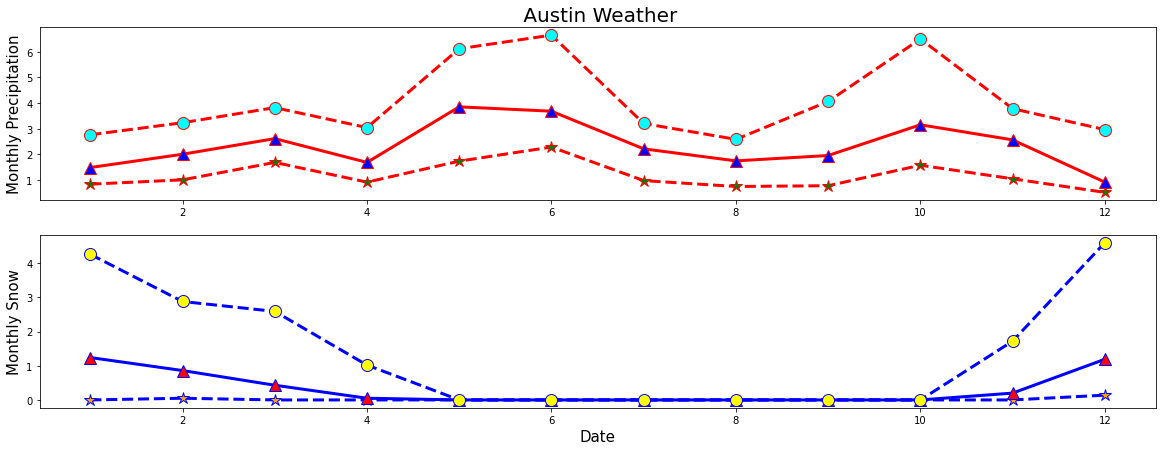

In [ ]:
#plot
mpl.rcParams['figure.figsize'] = (20,7)
fig, (ax1,ax2) = plt.subplots(2,1)
X = austin_weather['DATE']
Y = austin_weather['MLY-PRCP-25PCTL']
Y1 = austin_weather['MLY-PRCP-50PCTL']
Y2 = austin_weather['MLY-PRCP-75PCTL']
X2 = seattle_avg_snowfall.index
Y3 = seattle_avg_snowfall['MLY-SNOW-25PCTL']
Y4 = seattle_avg_snowfall['MLY-SNOW-50PCTL']
Y5 = seattle_avg_snowfall['MLY-SNOW-75PCTL']
ax1.plot(X,Y, color="red", marker="*",markersize =12, markerfacecolor ="green", linewidth=3, linestyle ="--")
ax1.plot(X,Y1, color="red", marker="^",markersize =12, markerfacecolor ="blue", linewidth=3)
ax1.plot(X,Y2, color="red", marker="o",markersize =12, markerfacecolor ="cyan", linewidth=3, linestyle ="--")
ax2.plot(X2,Y3, color="blue", marker="*",markersize =12, markerfacecolor ="orange", linewidth=3, linestyle ="--")
ax2.plot(X2,Y4, color="blue", marker="^",markersize =12, markerfacecolor ="red", linewidth=3)
ax2.plot(X2,Y5, color="blue", marker="o",markersize =12, markerfacecolor ="yellow", linewidth=3, linestyle ="--")
ax2.set_xlabel("Date", size=15)
ax1.set_ylabel("Monthly Precipitation", size=15)
ax2.set_ylabel("Monthly Snow", size=15)
ax1.set_title(" Austin Weather", size=20)

In [ ]:
from matplotlib import rcParams
#rcParams

In [ ]:
medals = pd.read_csv("medals_by_country_2016.csv")
climate_change = pd.read_csv('climate_change.csv')
summers = pd.read_csv('summer2016.csv')


In [ ]:
medals = medals.loc[:,~medals.columns.str.contains('unnamed', case=False)]
summers = summers.loc[:,~summers.columns.str.contains('unnamed', case=False)]
climate_change['date'] = pd.to_datetime(climate_change['date'])
climate_change.info(), summers.info()

NameError: ignored

In [ ]:
summers.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [ ]:
summers.drop(['Year', 'Games','City','Season','ID'], axis = 1,inplace= True)


In [ ]:
summers.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Sport,Event,Medal
0,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,Rowing,Rowing Men's Coxless Pairs,Bronze
1,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,Luc Abalo,M,31.0,182.0,86.0,France,FRA,Handball,Handball Men's Handball,Silver
3,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [ ]:
pd.set_option('display.max_rows',500)
medal_count = summers.groupby('Team')['Medal'].count().sort_values( ascending = False)
medal_count = pd.DataFrame(medal_count)
medal_count.columns
medal_count.head()

,Medal
Team,
United States,255
Germany,157
Great Britain,143
Russia,113
China,109


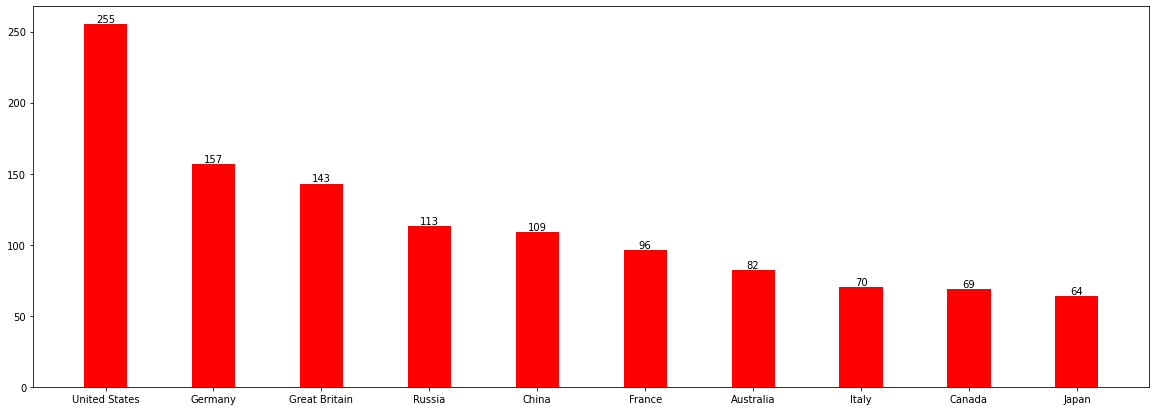

In [ ]:
#plotting medal count by top 10 countries
fig,ax = plt.subplots()
X = medal_count.index[:10]
Y = medal_count['Medal'][:10]
ax.bar(X,Y, 0.4, color ='red')
for i in range(len(X)):
  ax.annotate(str(Y[i]), xy = (X[i],Y[i]),ha='center', va='bottom')

In [ ]:
#plotting medal counts for gold. sliver and bronze for top 10 countries
medal_gold = summers[summers['Medal']=='Gold']
medal_silver = summers[summers['Medal']=='Silver']
medal_bronze = summers[summers['Medal']=='Bronze']
gold_count = pd.DataFrame(medal_gold.groupby('Team')['Medal'].count().sort_values(ascending= False))
silver_count = pd.DataFrame(medal_silver.groupby('Team')['Medal'].count().sort_values(ascending= False))
bronze_count = pd.DataFrame(medal_bronze.groupby('Team')['Medal'].count().sort_values(ascending= False))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


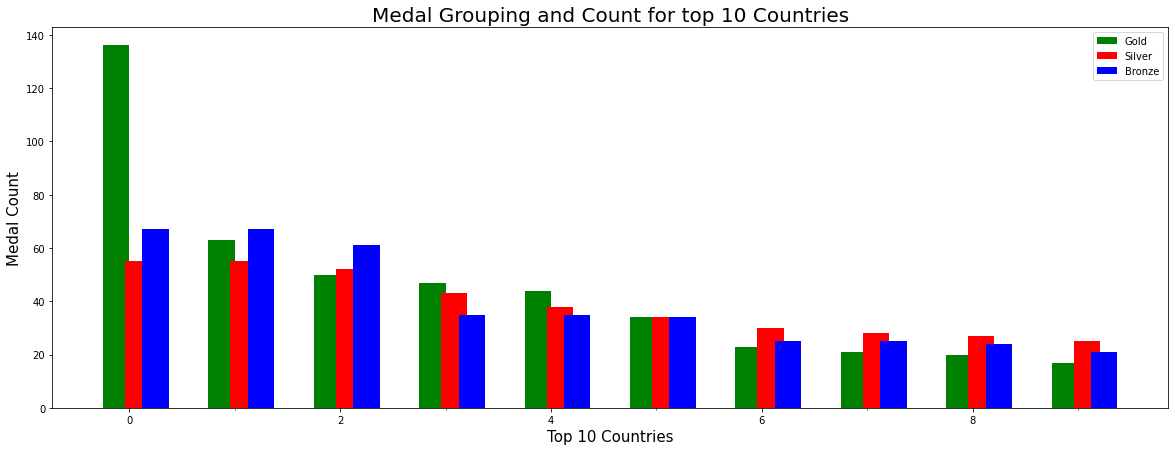

In [ ]:
#plotting group bar graphs for top 10 countries

X1 = list(gold_count.index[:10])
Y1 = gold_count['Medal'][:10]
Y2 = silver_count['Medal'][:10]
Y3 = bronze_count['Medal'][:10]
p = np.arange(len(X1))
width = 0.5
fig, ax = plt.subplots()
g =ax.bar(p-width/4,Y1,width/2,label="Gold", color="green")
s =ax.bar(p+width/6,Y2,width/2,label="Silver", color="red")
b =ax.bar(p+width/2,Y3,width/2,label="Bronze", color="blue")
ax.set_ylabel("Medal Count", size=15)
ax.set_xlabel("Top 10 Countries", size=15)
ax.set_title("Medal Grouping and Count for top 10 Countries", size =20)
ax.set_xticks(p,X1)
ax.legend()


#Plotting timeseries data

#multiple axes in the plot

In [ ]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
#upload cliamte change data
uploaded = files.upload()

Saving summer2016.csv to summer2016.csv
Saving medals_by_country_2016.csv to medals_by_country_2016.csv
Saving climate_change.csv to climate_change.csv
Saving austin_weather.csv to austin_weather.csv
Saving seattle_weather.csv to seattle_weather.csv


In [ ]:
climate_change = pd.read_csv('climate_change.csv', parse_dates= ['date'])
climate_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           706 non-null    datetime64[ns]
 1   co2            699 non-null    float64       
 2   relative_temp  706 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 16.7 KB


In [ ]:
#random experiment with changing the 
climate_change['co2'].isna()
co2_avg = climate_change['co2'].agg('mean')
co2_nan = climate_change['co2'].loc[climate_change['co2'].isna()]
type(co2_nan.index)
for i in co2_nan.index:
  co2_nan[i] = co2_avg
co2_nan

3      352.316481
7      352.316481
71     352.316481
72     352.316481
73     352.316481
213    352.316481
313    352.316481
Name: co2, dtype: float64

In [ ]:
#climate_change['co2'] = climate_change['co2'].fillna(method="bfill")
climate_change['co2'] = climate_change['co2'].fillna(value = co2_avg)
climate_change['year'] = climate_change['date'].dt.year
climate_change.info()
climate_change.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           706 non-null    datetime64[ns]
 1   co2            706 non-null    float64       
 2   relative_temp  706 non-null    float64       
 3   year           706 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 22.2 KB


,date,co2,relative_temp,year
0,1958-03-06,315.710000,0.10,1958
1,1958-04-06,317.450000,0.01,1958
2,1958-05-06,317.500000,0.08,1958
3,1958-06-06,352.316481,-0.05,1958
4,1958-07-06,315.860000,0.06,1958


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Annual Climate Change Metrics')

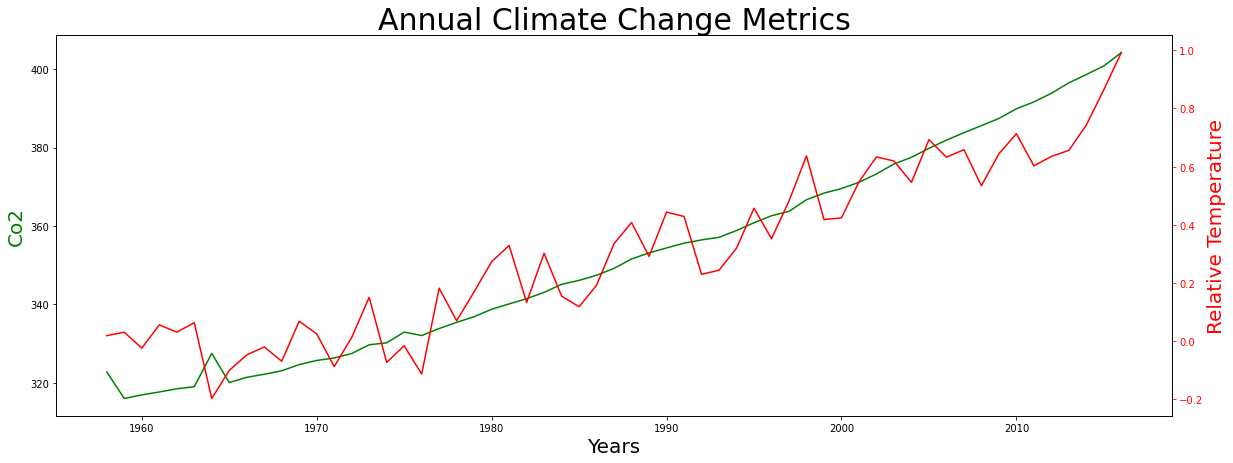

In [ ]:
climate_change_yearly = climate_change.groupby('year')['co2','relative_temp'].mean()
#climate_change_yearly.info()
climate_change_yearly.head()
#plotting
import matplotlib as mpl
from matplotlib import rcParams
rcParams['figure.figsize'] = (20,7)
fig, ax = plt.subplots()
X = climate_change_yearly.index
Y= climate_change_yearly['co2']
Y2= climate_change_yearly['relative_temp']
ax.plot(X,Y, color ="green")
ax2= ax.twinx()
ax2.plot(X,Y2, color="red")
ax.set_xlabel("Years", size = 20)
ax.set_ylabel("Co2", size = 20, color='green')
ax2.set_ylabel("Relative Temperature", size = 20, color="red")
ax2.tick_params('y', colors ="red")
ax.set_title('Annual Climate Change Metrics', size =30)
#for i in range(len(X)):
#  ax.annotate(str(Y[i]),xy=(X[i],Y[i]), ha="center",va="center")


Text(0.5, 1.0, 'Climate change')

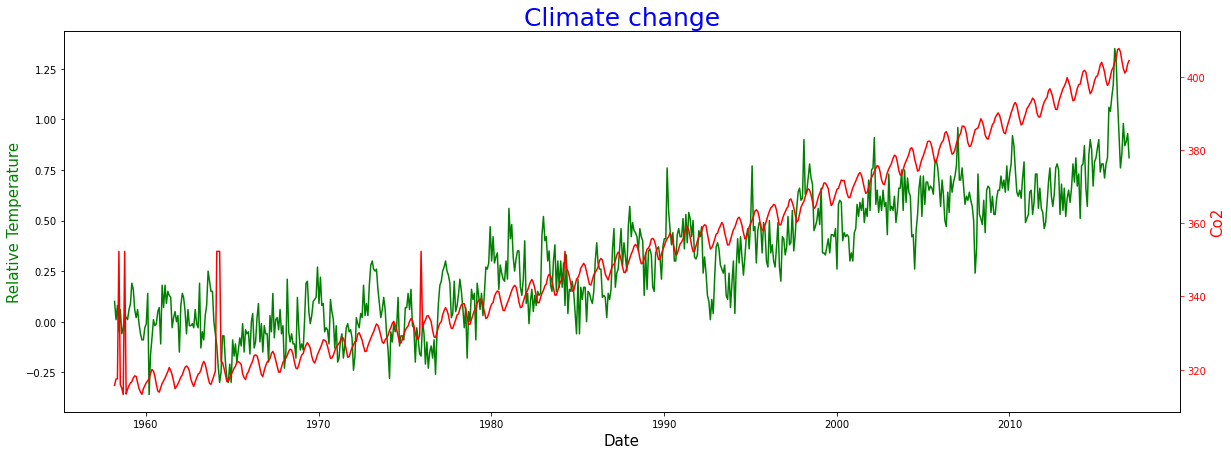

In [ ]:
#plotting
import matplotlib as mpl
from matplotlib import rcParams
rcParams['figure.figsize'] = (20,7)
fig, ax = plt.subplots()
X = climate_change['date']
Y = climate_change['relative_temp']
Y1 = climate_change['co2']
ax2 = ax.twinx()
ax.plot(X,Y, color = 'green')
ax2.plot(X,Y1, color="red")
ax.set_xlabel("Date", size=15)
ax.set_ylabel("Relative Temperature", size=15, color ="green")
ax2.set_ylabel("Co2", size =15, color= "red")
ax2.tick_params(colors="red")
ax.set_title("Climate change", size=25, color="blue")

#anotating time series plots

Text(2015-10-06 00:00:00, -0.2, '>1 degree')

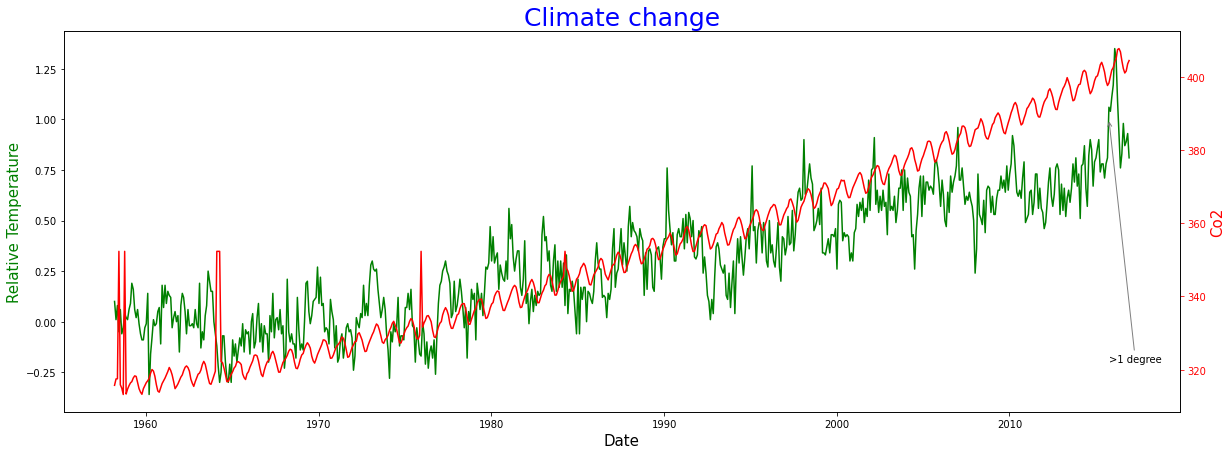

In [ ]:
#plotting
import matplotlib as mpl
from matplotlib import rcParams
rcParams['figure.figsize'] = (20,7)
fig, ax = plt.subplots()
X = climate_change['date']
Y = climate_change['relative_temp']
Y1 = climate_change['co2']
ax2 = ax.twinx()
ax.plot(X,Y, color = 'green')
ax2.plot(X,Y1, color="red")
ax.set_xlabel("Date", size=15)
ax.set_ylabel("Relative Temperature", size=15, color ="green")
ax2.set_ylabel("Co2", size =15, color= "red")
ax2.tick_params(colors="red")
ax.set_title("Climate change", size=25, color="blue")
ax.annotate('>1 degree',xy=(pd.Timestamp("2015-10-06"),1), xytext=(pd.Timestamp('2015-10-06'),-.2), arrowprops={'arrowstyle':'->', "color":"gray"})

#quantitative charts - Bar charts and Histograms

In [ ]:
uploaded = files.upload()

Saving summer2016.csv to summer2016 (1).csv
Saving medals_by_country_2016.csv to medals_by_country_2016 (1).csv
Saving climate_change.csv to climate_change (1).csv
Saving austin_weather.csv to austin_weather (1).csv
Saving seattle_weather.csv to seattle_weather (1).csv


In [ ]:
medals = pd.read_csv("medals_by_country_2016 (1).csv")
summers = pd.read_csv('summer2016.csv')
#medals = medals.loc[:,~medals.columns.str.contains('unnamed', case=False)]
summers = summers.loc[:,~summers.columns.str.contains('unnamed', case=False)]

In [ ]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     object
 1   Bronze      10 non-null     int64 
 2   Gold        10 non-null     int64 
 3   Silver      10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


In [ ]:
medals['Country']= medals.iloc[:,0]
medals = medals.loc[:,~medals.columns.str.contains('unnamed', case=False)]
medals.head()

,Bronze,Gold,Silver,Country
0,67,137,52,United States
1,67,47,43,Germany
2,26,64,55,Great Britain
3,35,50,28,Russia
4,35,44,30,China


No handles with labels found to put in legend.


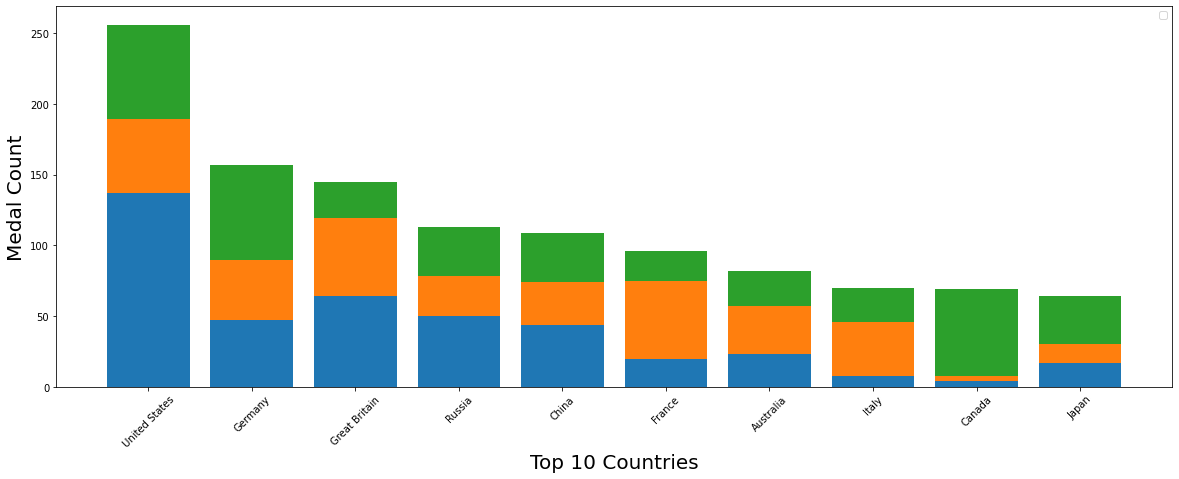

In [ ]:
#plotting
fig,ax= plt.subplots()
X = medals['Country']
Y1 = medals['Gold']
Y2 = medals['Silver']
Y3 = medals['Bronze']
ax.bar(X,Y1)
ax.bar(X,Y2,bottom= Y1 )
ax.bar(X,Y3, bottom = Y1 +Y2)
ax.set_xlabel("Top 10 Countries",size =20)
ax.set_ylabel("Medal Count",size =20)
ax.set_xticklabels(X, rotation =45)
ax.legend()

In [ ]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving summer2016.csv to summer2016 (2).csv
Saving medals_by_country_2016.csv to medals_by_country_2016 (2).csv
Saving climate_change.csv to climate_change (2).csv
Saving austin_weather.csv to austin_weather (2).csv
Saving seattle_weather.csv to seattle_weather (2).csv
Saving employees.sqlite to employees.sqlite


In [ ]:
summers = pd.read_csv("summer2016 (2).csv")
medals = pd.read_csv('medals_by_country_2016 (2).csv')
climate_change = pd.read_csv('climate_change (2).csv')
austin_weather = pd.read_csv('austin_weather (2).csv')
seattle_weather = pd.read_csv('seattle_weather (2).csv')

In [ ]:
summers = summers.loc[:, ~summers.columns.str.contains('unnamed',case = False)]
summers.info()
summers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2014 non-null   int64  
 1   Name    2014 non-null   object 
 2   Sex     2014 non-null   object 
 3   Age     2014 non-null   float64
 4   Height  2014 non-null   float64
 5   Weight  2014 non-null   float64
 6   Team    2014 non-null   object 
 7   NOC     2014 non-null   object 
 8   Games   2014 non-null   object 
 9   Year    2014 non-null   int64  
 10  Season  2014 non-null   object 
 11  City    2014 non-null   object 
 12  Sport   2014 non-null   object 
 13  Event   2014 non-null   object 
 14  Medal   2014 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 236.1+ KB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


Text(0.5, 0.98, 'Distribution of Height and Weight of Men and Women in Rowing')

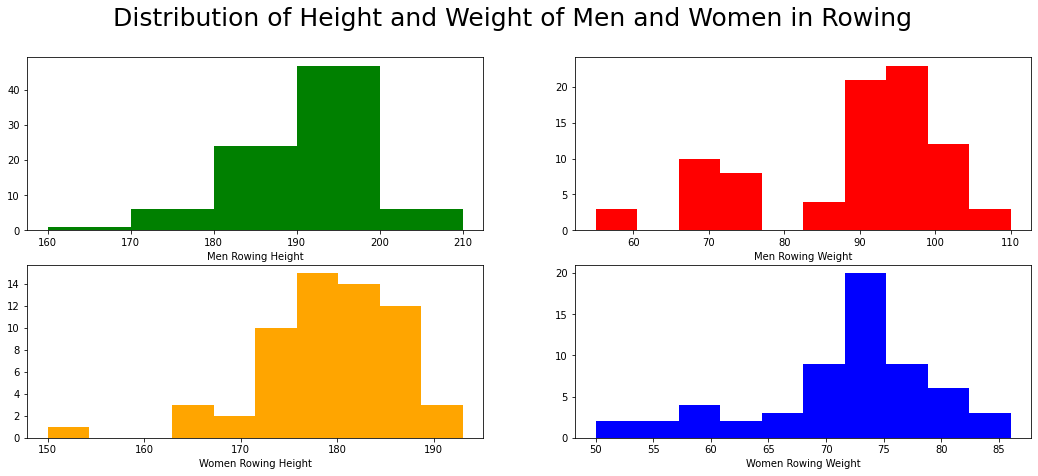

In [ ]:
#mean height for rowing
mpl.rcParams['figure.figsize'] =(18,7)
fig, axs = plt.subplots(2,2)
df_rowing_men = summers[(summers['Sport']=='Rowing') & (summers['Sex']=='M')]
df_rowing_women = summers[(summers['Sport']=='Rowing') & (summers['Sex']=='F')]

X = "Height"
Y = df_rowing_men['Height']
axs[0,0].hist(Y, color ='green', bins=[160,170,180,190,200,210])
axs[0,0].set_xlabel("Men Rowing Height")
Y1 = df_rowing_men['Weight']
X1 ="Weight"
#ax2=ax.twinx()
axs[0,1].hist(Y1,color='red')
#ax.set_xlabel("Rowing Men", size = 20)
axs[0,1].set_xlabel("Men Rowing Weight")

#X2 = "Height"
Y2 = df_rowing_women['Height']
axs[1,0].hist(Y2, color ='orange')
axs[1,0].set_xlabel("Women Rowing Height")

Y3 = df_rowing_women['Weight']
X3 ="Weight"
#ax2=ax.twinx()
axs[1,1].hist(Y3,color='blue')
axs[1,1].set_xlabel("Women Rowing Weight")
fig.suptitle("Distribution of Height and Weight of Men and Women in Rowing", size = 25)

#ax.set_xlabel("Rowing Men", size = 20)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Weight (kg)')

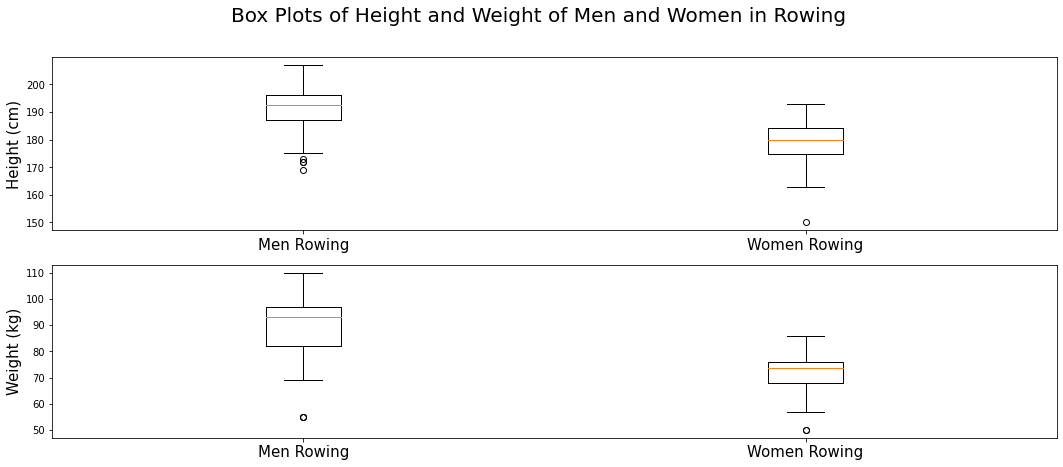

In [ ]:
#boxplots

fig, (ax1,ax2) = plt.subplots(2,1)
fig.suptitle("Box Plots of Height and Weight of Men and Women in Rowing", size =20)
ax1.boxplot([Y,Y2])
ax1.set_xticklabels(['Men Rowing','Women Rowing'], size =15)
ax1.set_ylabel("Height (cm)", size = 15)
ax2.boxplot([Y1,Y3])
ax2.set_xticklabels(['Men Rowing','Women Rowing'], size =15)
ax2.set_ylabel("Weight (kg)", size = 15)

In [ ]:
climate_change['date'] = pd.to_datetime(climate_change['date'])
climate_change.set_index('date',drop=True, inplace= True)

ggplot
bmh
default
seaborn
fivethirtyeight
seaborn-bright


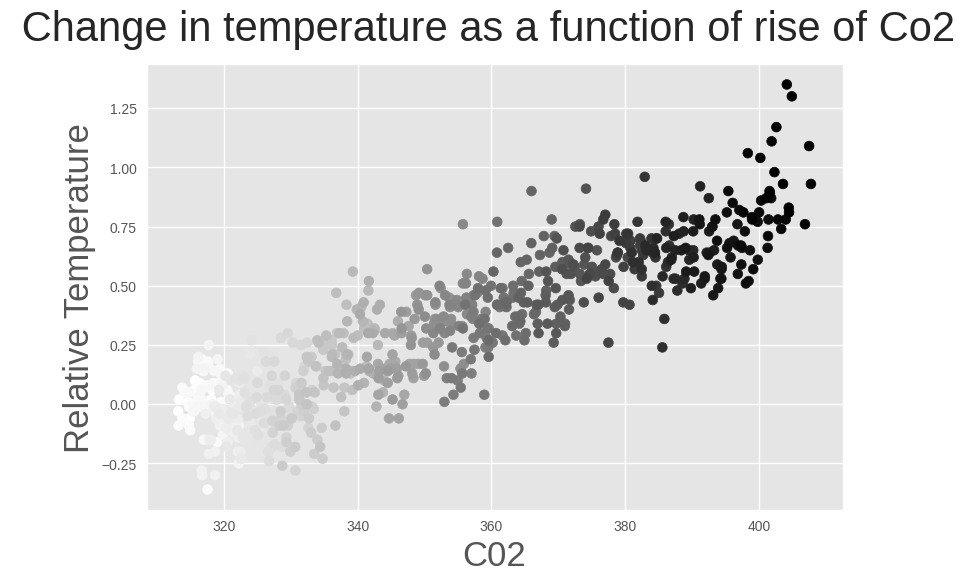

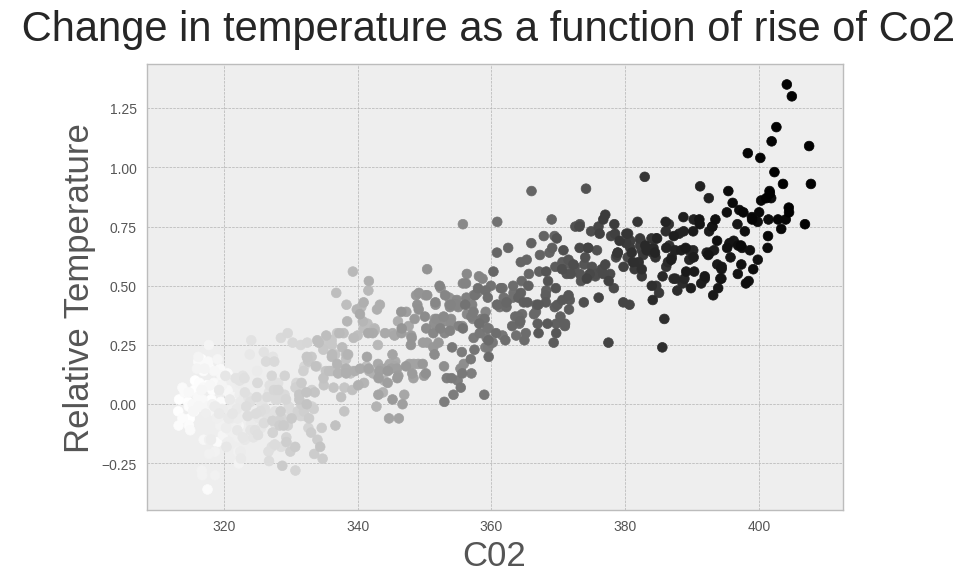

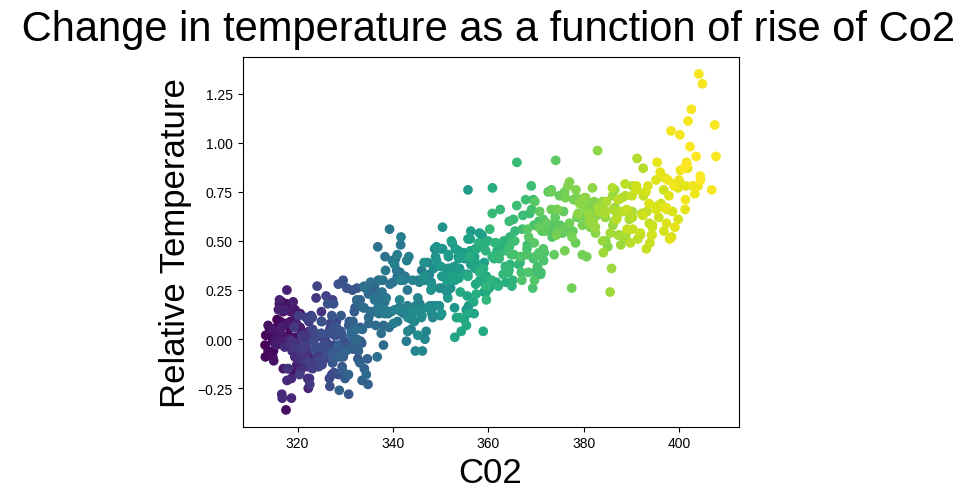

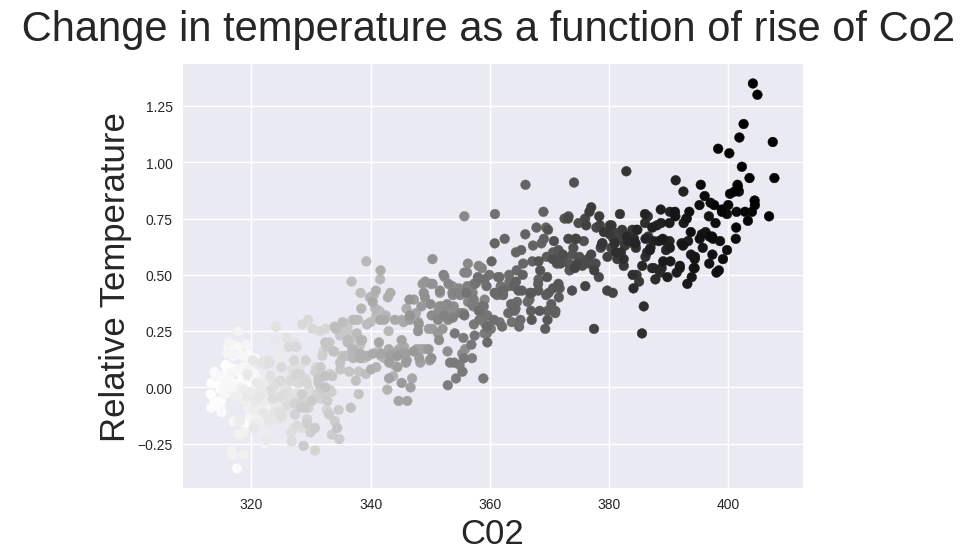

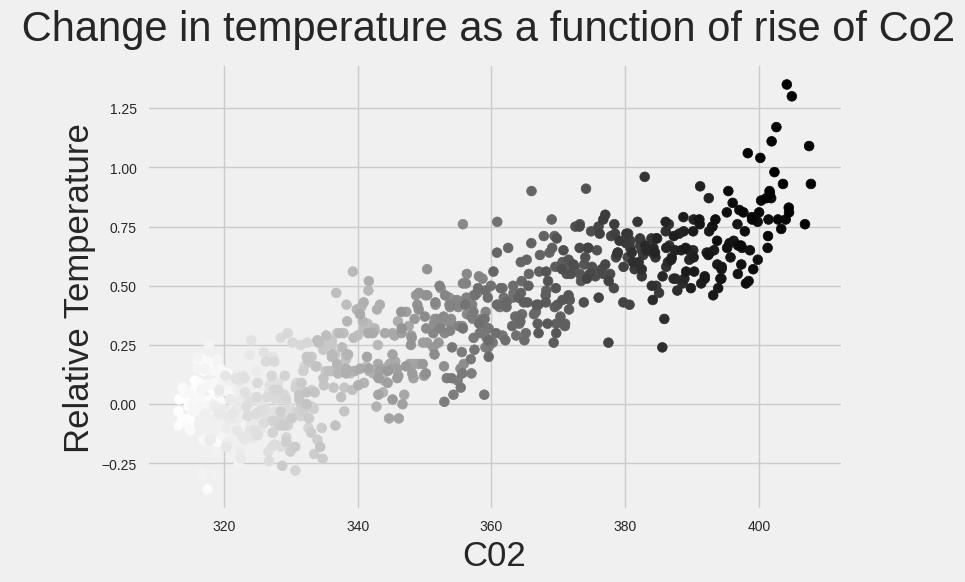

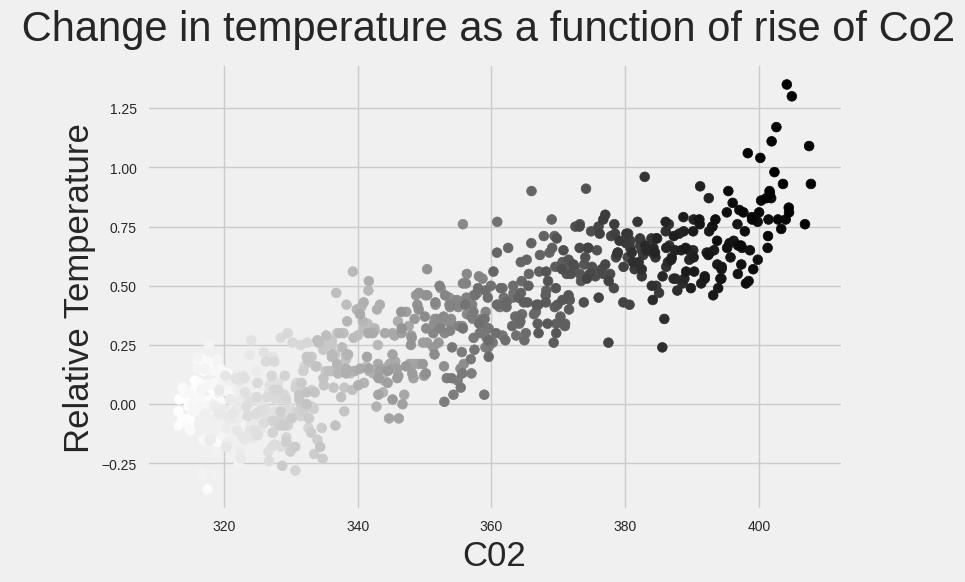

In [ ]:
#scatter plots
styles =['ggplot','bmh','default','seaborn','fivethirtyeight', 'seaborn-bright']
for style in styles:
  print(style)
  plt.style.use(style)
  fig,ax = plt.subplots()
  fig.suptitle(" Change in temperature as a function of rise of Co2", size =30)
  ax.scatter(climate_change['co2'],climate_change['relative_temp'], c= climate_change.index)
  ax.set_xlabel("C02", size = 25)
  ax.set_ylabel("Relative Temperature", size = 25)
  fig.savefig('climate_change'+style+'.png')

# Data Visualization with Seaborn

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()

Saving student-alcohol-consumption.csv to student-alcohol-consumption.csv
Saving young-people-survey-responses.csv to young-people-survey-responses.csv
Saving mpg.csv to mpg.csv
Saving countries-of-the-world.csv to countries-of-the-world.csv


In [4]:
student_alcohol_consumption = pd.read_csv('student-alcohol-consumption.csv')
survey_responses = pd.read_csv('young-people-survey-responses.csv')
mpg = pd.read_csv('mpg.csv')
countries = pd.read_csv('countries-of-the-world.csv')

In [24]:
student_alcohol_consumption = student_alcohol_consumption.loc[:,~student_alcohol_consumption.columns.str.contains('unnamed',case=False)]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
#student_alcohol_consumption.info()
student_alcohol_consumption.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


In [13]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [36]:
countries['Country'] = countries['Country'].str.strip()


In [45]:
BRICS = countries[(countries['Country']=='India')| (countries['Country']=='China') | (countries['Country']=='Brazil')| (countries['Country']=='South Africa')| (countries['Country']=='Russia')]

In [46]:
BRICS

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,"22,1","0,09","-0,03","29,61",7600.0,"86,4","225,3","6,96","0,9","92,15",2,"16,56","6,17","0,084","0,4","0,516"
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",5000.0,"90,9","266,7","15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403"
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,"333,2","0,21","-0,07","56,29",2900.0,"59,5","45,4","54,4","2,74","42,86","2,5","22,01","8,18","0,186","0,276","0,538"
169,Russia,C.W. OF IND. STATES,142893540,17075200,"8,4","0,22","1,02","15,39",8900.0,"99,6","280,6","7,33","0,11","92,56",NaN,"9,95","14,65","0,054","0,371","0,575"
189,South Africa,SUB-SAHARAN AFRICA,44187637,1219912,"36,2","0,23","-0,29","61,81",10700.0,"86,4","107,0","12,08","0,79","87,13",1,"18,2",22,"0,025","0,303","0,671"


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Brazil'),
 Text(0, 0, 'China'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Russia'),
 Text(0, 0, 'South Africa')]

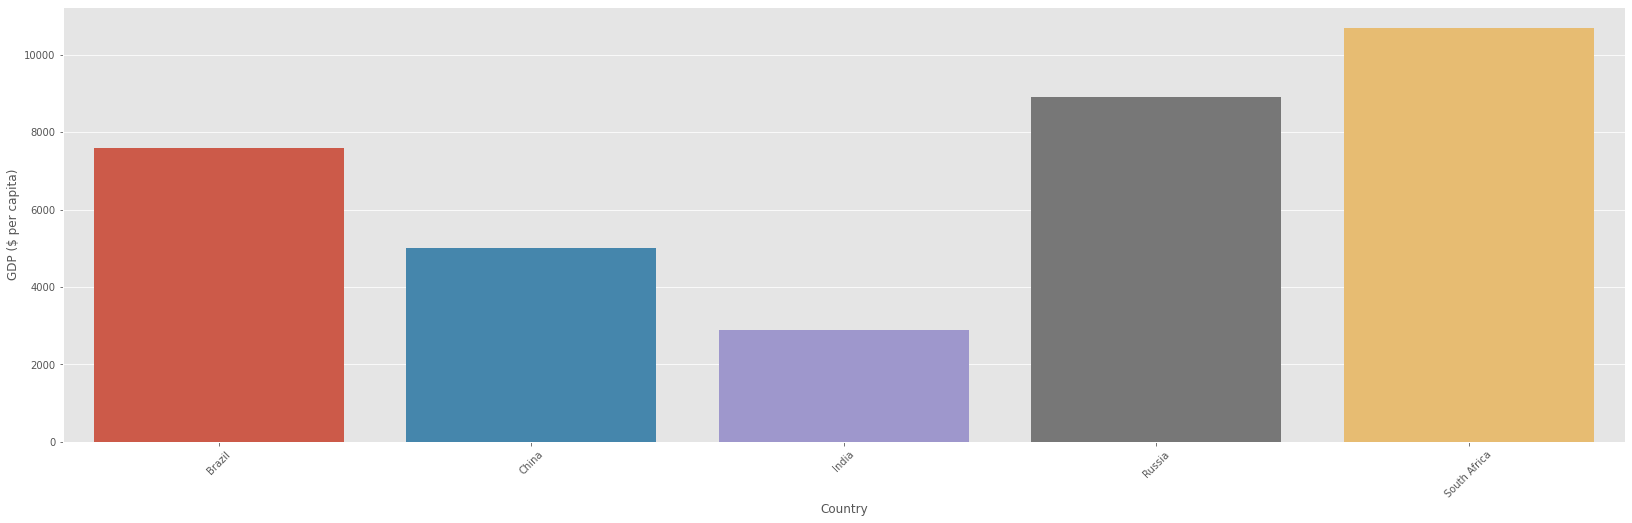

In [73]:
#Plotting using Seaborn
from matplotlib import rcParams
plt.style.use('ggplot')
rcParams['figure.figsize']=(28,8)
fig, ax = plt.subplots()
sns.barplot('Country','GDP ($ per capita)', data = BRICS) 
ax.set_xticklabels(BRICS['Country'],rotation =45)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '36,0'),
 Text(1, 0, '86,5'),
 Text(2, 0, '70,0'),
 Text(3, 0, '97,0'),
 Text(4, 0, '100,0')]

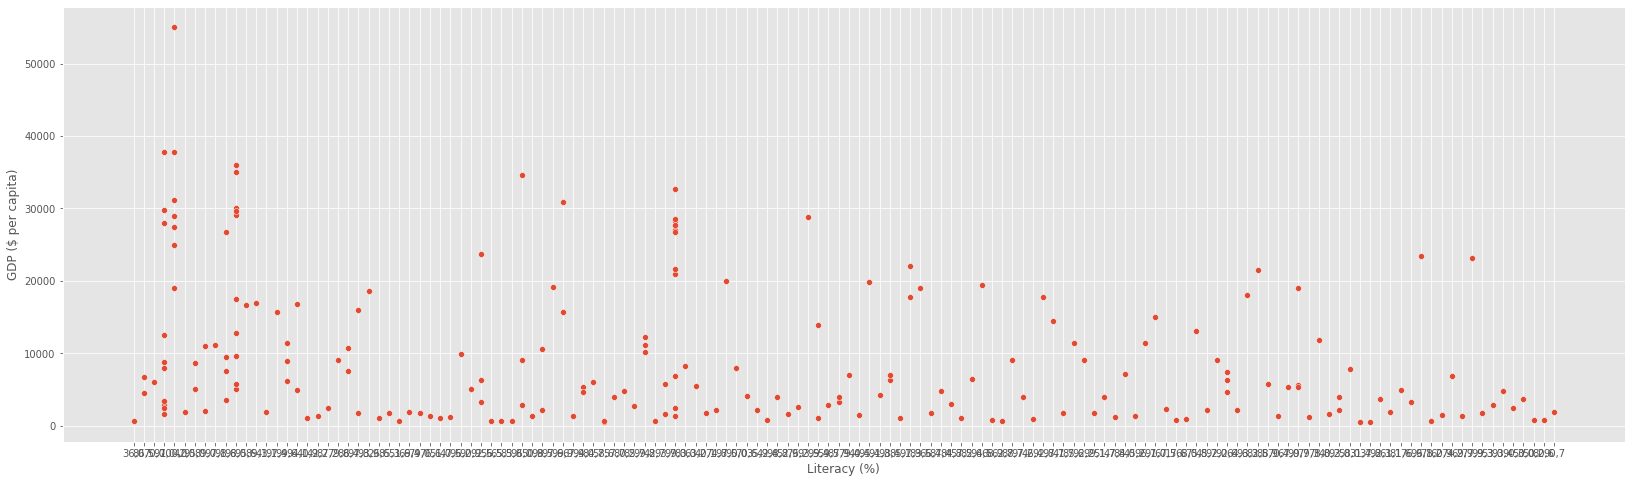

In [68]:
sns.scatterplot('Literacy (%)','GDP ($ per capita)', data =countries)
ax.set_xticklabels(countries['Literacy (%)'],rotation =45)

In [78]:
#mpg.info()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


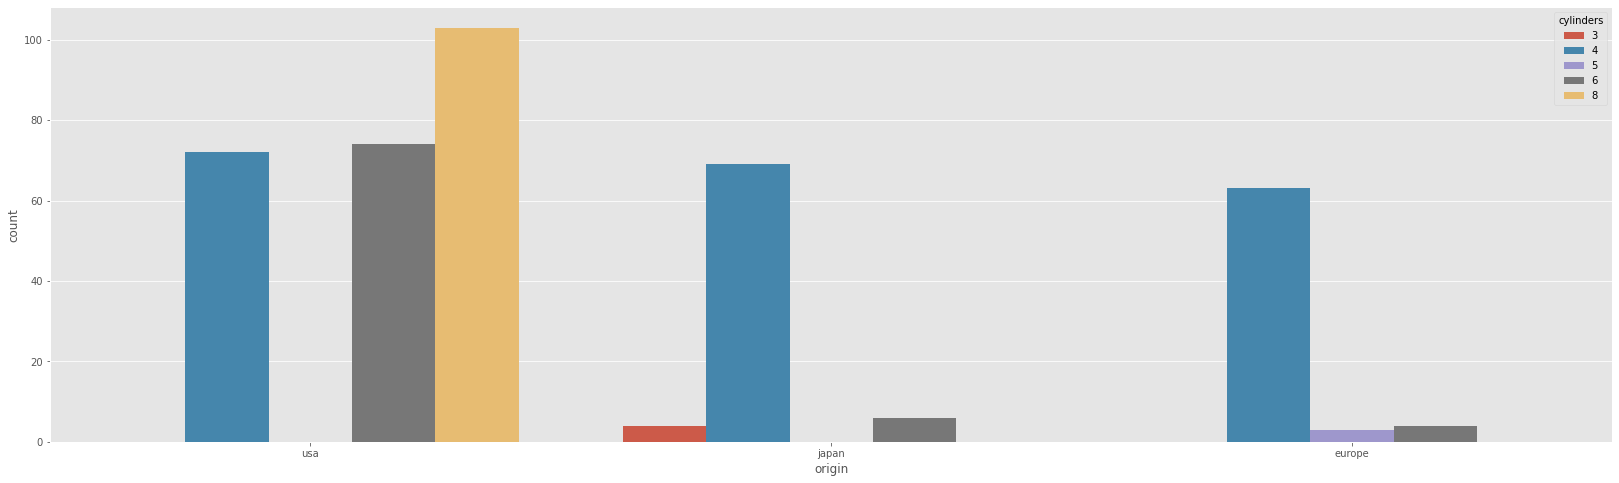

In [83]:
sns.countplot('origin',data=mpg, hue='cylinders')

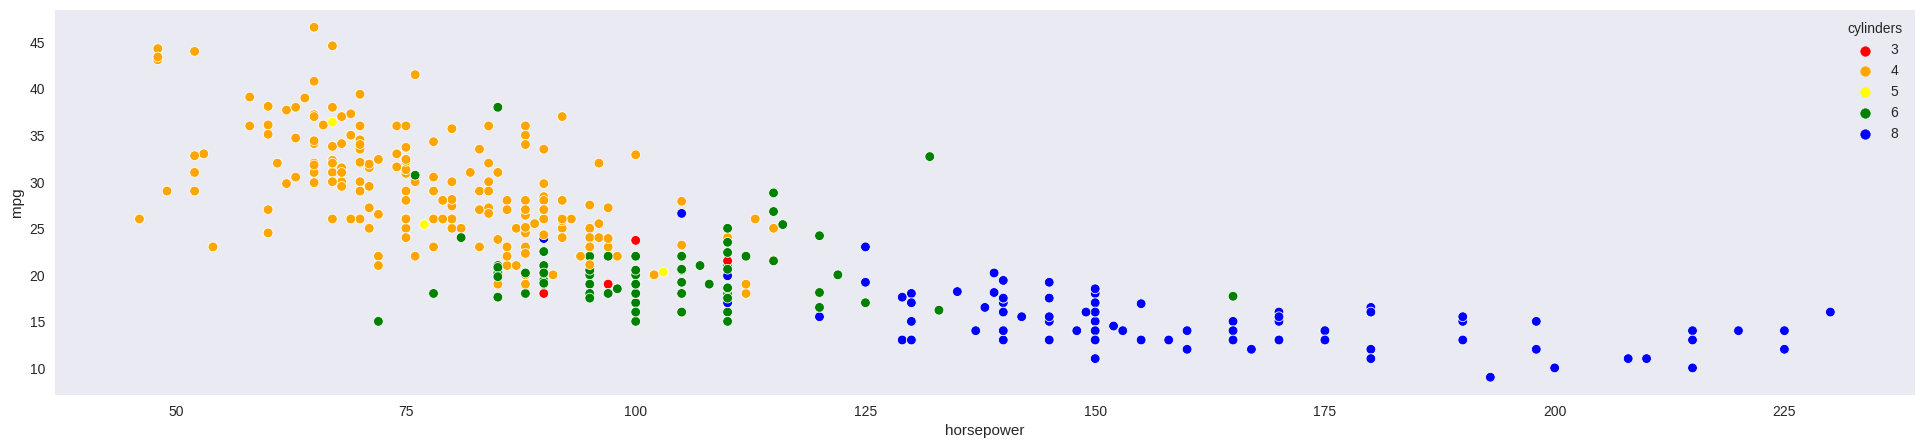

In [110]:
rcParams['figure.figsize'] =(24,5)
plt.style.use('seaborn-dark')
hue_colors ={3:'red',4:'orange',5:'yellow',6:'green',8:'blue'}
sns.scatterplot(x='horsepower',y='mpg',hue ="cylinders",data =mpg, palette = hue_colors)

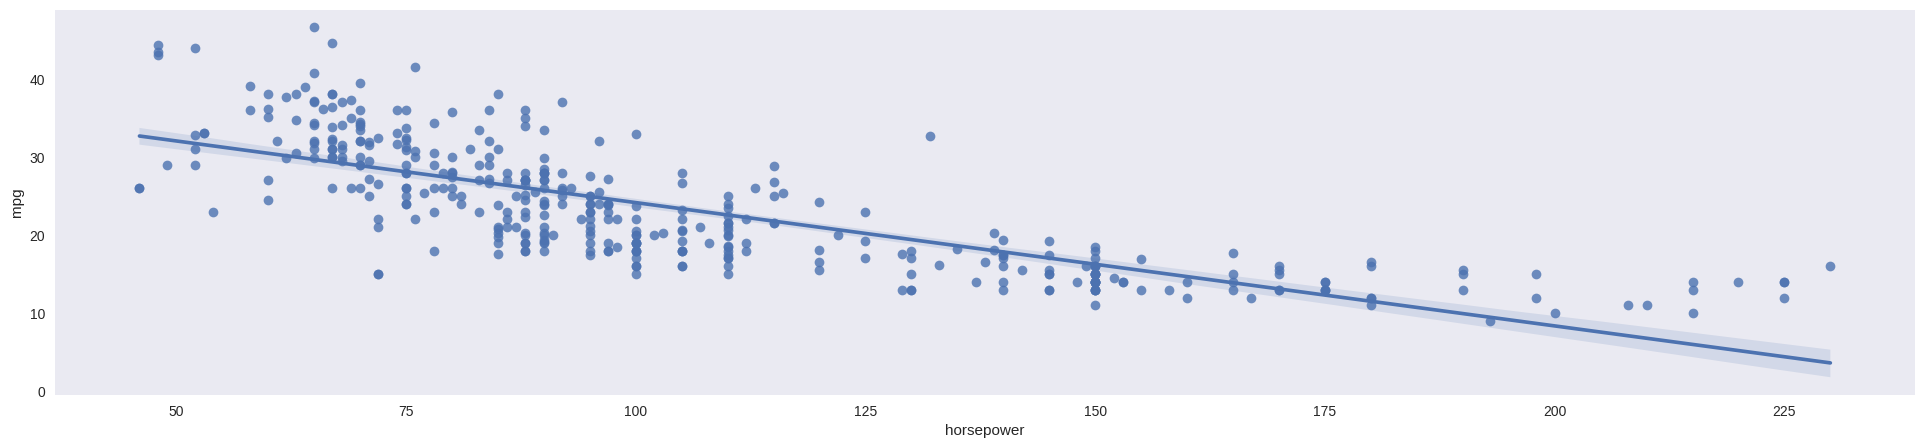

In [112]:
hue_colors ={3:'red',4:'orange',5:'yellow',6:'green',8:'blue'}
sns.regplot(x='horsepower',y='mpg',data =mpg)

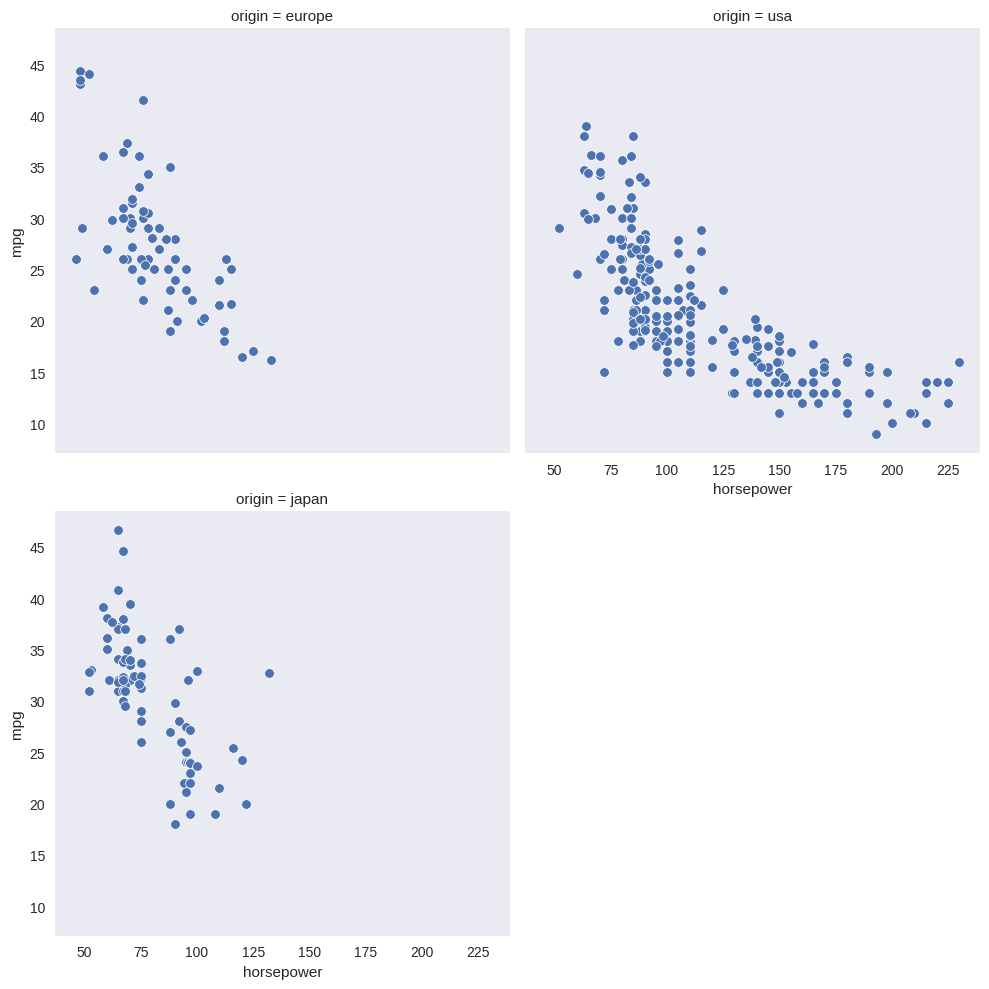

In [120]:
#relplot
#relplot lets yiu create subplots in a single figure
#rcParams['figure.figsize']=(20,6)
sns.relplot(x="horsepower",y="mpg",data=mpg, kind = "scatter", col="origin", col_order=['europe','usa','japan'],col_wrap=2)

In [121]:
mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


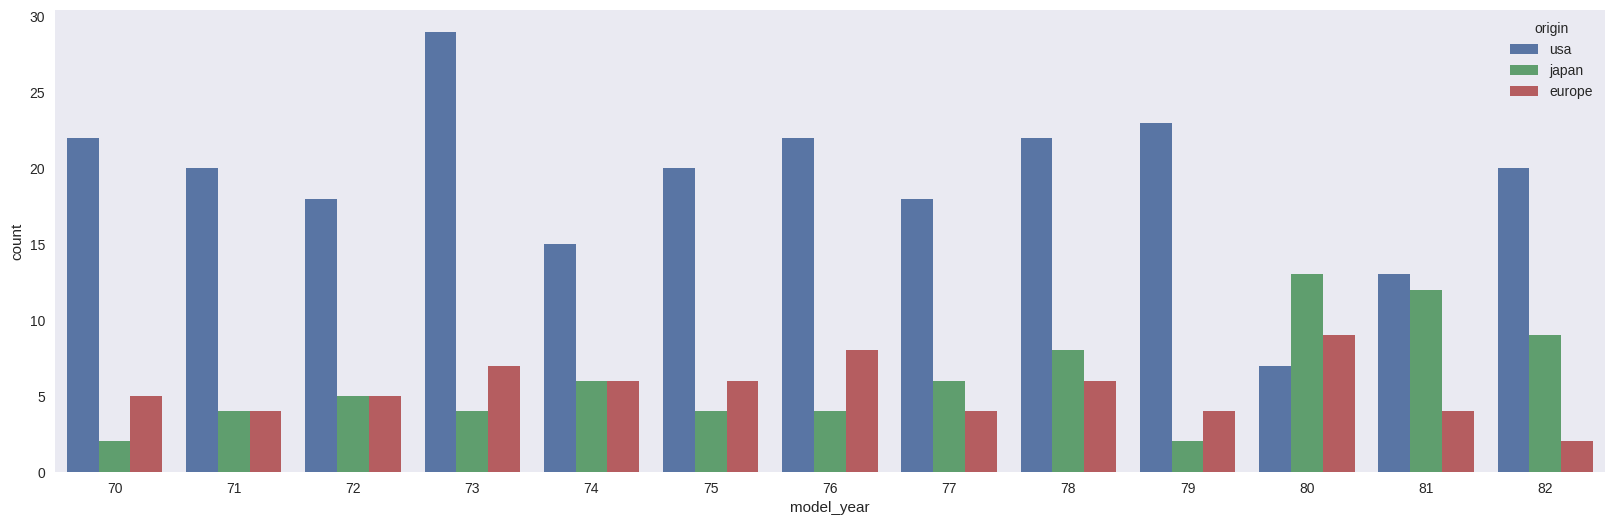

In [130]:
#relplot and scatter plot combined
mpg.model_year.unique()
sns.countplot('model_year', data=mpg, hue='origin')
#sns.countplot('model_year', data=mpg[mpg['origin']=='japan'])
#sns.countplot('model_year', data=mpg[mpg['origin']=='europe'])

In [131]:
mpg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


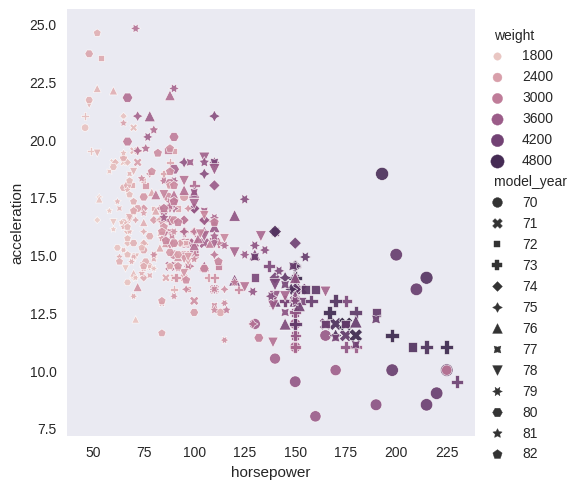

In [145]:
#including
sns.relplot(x='horsepower',y='acceleration', kind ='scatter',size='weight', data =mpg, hue ="weight", alpha=9/10, style="model_year")

In [146]:
#line plot using seaborn
uploaded = files.upload()

Saving city_day.csv to city_day.csv


In [147]:
uploaded = files.upload()

Saving AirQualityUCI.csv to AirQualityUCI.csv


In [148]:
air_quality = pd.read_csv('AirQualityUCI.csv')

In [154]:
pollution= pd.read_csv('city_day.csv')
pollution.shape
pollution.info()
pollution.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


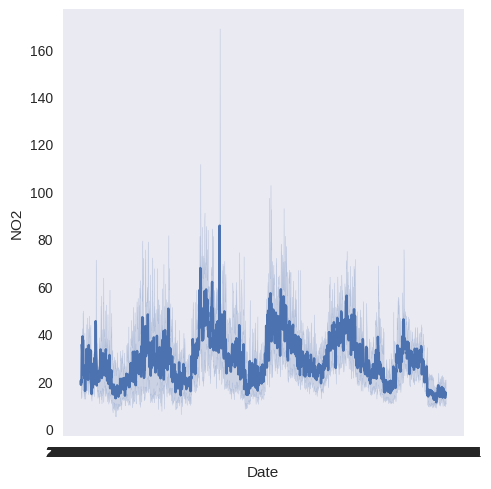

In [160]:
sns.relplot(x='Date',y='NO2', data=pollution, kind="line")

In [169]:
pollution_date = pollution.groupby(['Date'])['NO2','SO2','CO','O3'].mean().sort_values(by="NO2", ascending= False)
pollution_city = pollution.groupby(['City'])['NO2','SO2','CO','O3'].mean().sort_values(by="NO2", ascending= False)
#sns.lineplot(x='Date',y='NO2', data=pollution, hue="City", size="City")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [170]:
pollution_city.head()

,NO2,SO2,CO,O3
City,,,,
Ahmedabad,59.025496,55.253733,22.193407,39.155408
Delhi,50.785182,15.901253,1.976053,51.323610
Kolkata,40.396210,8.392101,0.799251,30.663233
Patna,37.487636,22.132505,1.533591,37.249146
Visakhapatnam,37.193188,12.660154,0.736739,37.523747


In [168]:
pollution_date.head()

,NO2,SO2,CO,O3
Date,,,,
2017-02-03,85.557500,10.026250,2.826667,41.437500
2016-10-20,67.722222,14.672222,2.039000,36.716667
2016-12-24,61.855714,14.995714,3.051111,39.228571
2016-12-23,61.401429,16.887143,3.242222,33.295714
2018-01-06,58.752500,23.221667,3.692308,46.674167


No handles with labels found to put in legend.


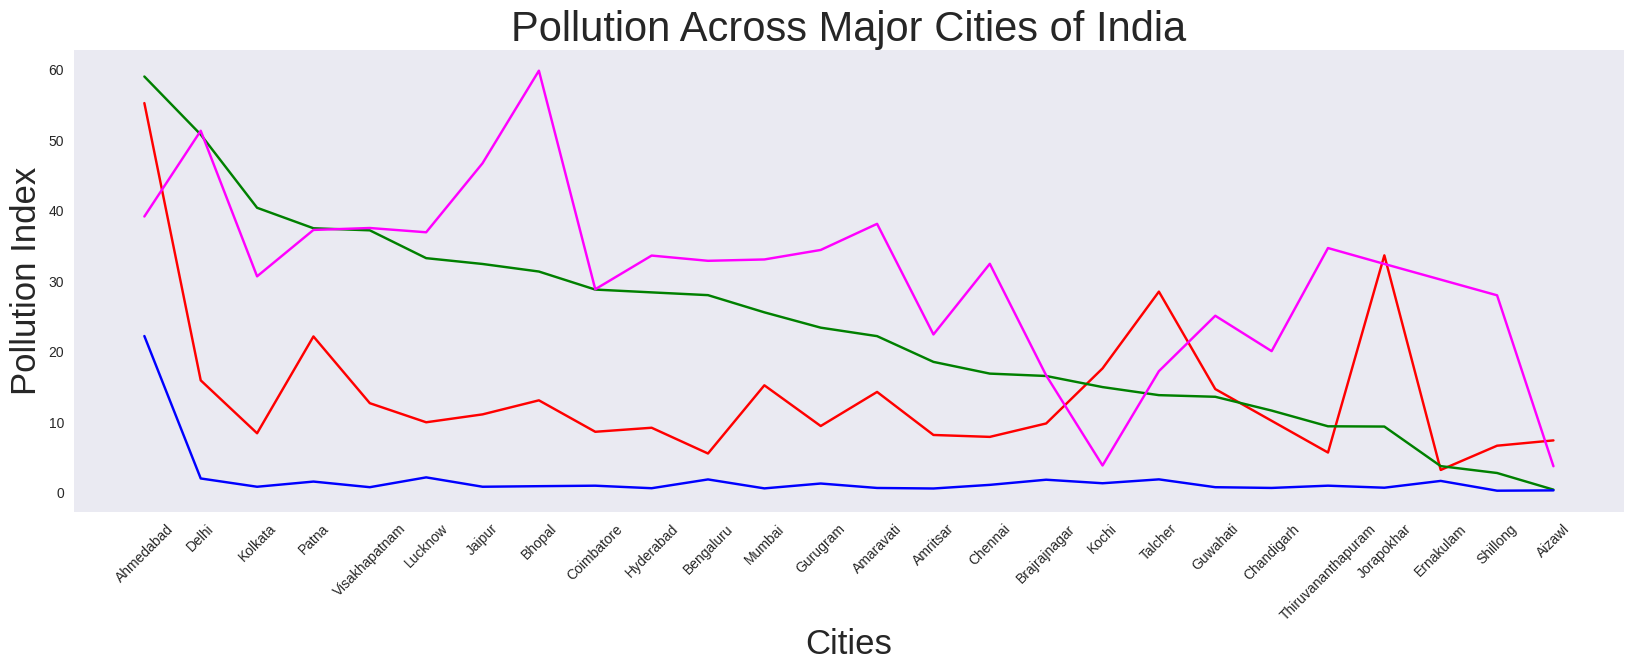

In [182]:
fig, ax = plt.subplots()
sns.lineplot(x=pollution_city.index, y='SO2',data = pollution_city, color="red")
sns.lineplot(x=pollution_city.index, y='NO2',data = pollution_city, color="green")
sns.lineplot(x=pollution_city.index, y='CO',data = pollution_city, color="blue")
sns.lineplot(x=pollution_city.index, y='O3',data = pollution_city,color="magenta")
ax.set_xticklabels(pollution_city.index, rotation = 45)
ax.set_xlabel("Cities", size = 25)
ax.set_ylabel("Pollution Index", size = 25)
ax.set_title("Pollution Across Major Cities of India", size= 30)
ax.legend()
plt.show()